Проанализируйте ряды, сделайте их стационарными.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import math
%matplotlib inline

In [2]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [3]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

Воспользуемся функциями с лекции.

In [4]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [5]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

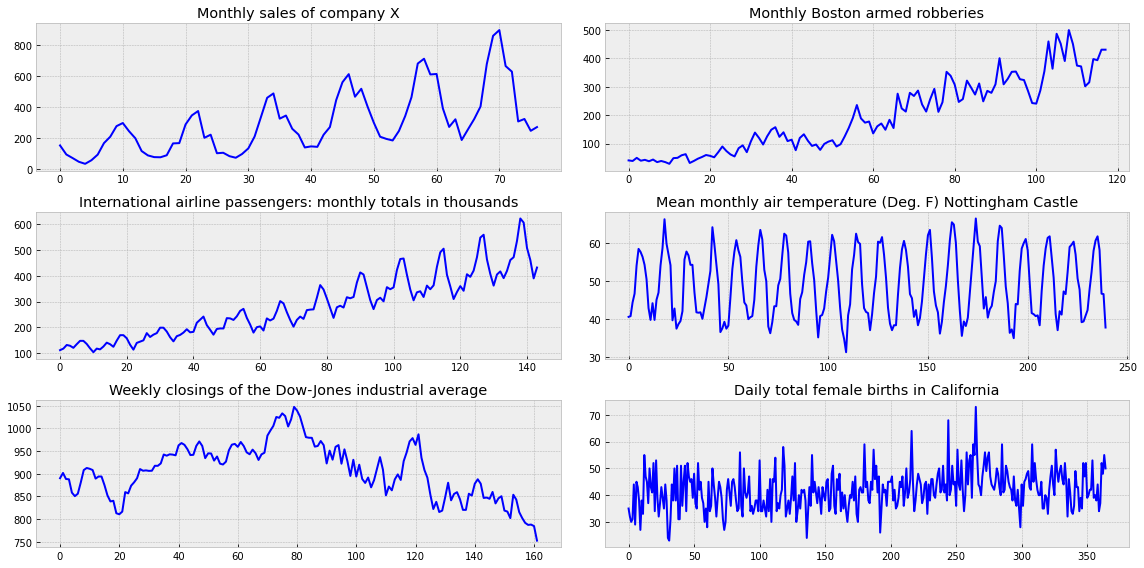

In [6]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

## Monthly sales of company X

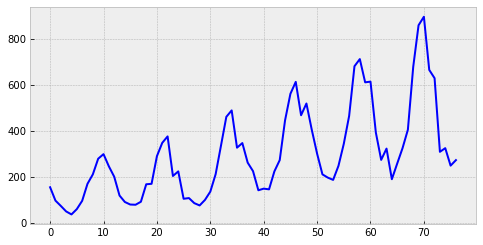

In [7]:
s1 = np.array(sales_of_company_x['Count'])
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(s1, color='blue')

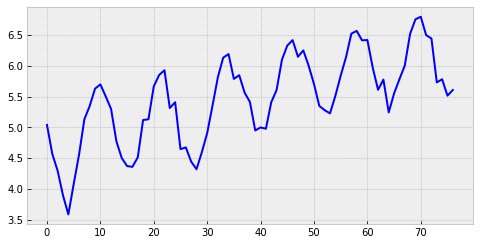

In [8]:
s1_0 = boxcox(s1,0)
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(s1_0, color='blue')

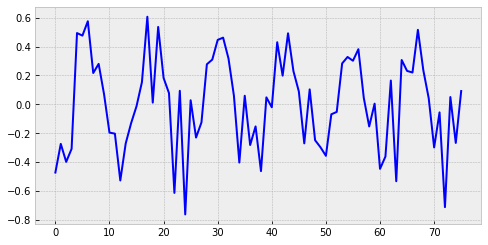

In [9]:
s1_1 = s1_0[1:] - s1_0[:-1]
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(s1_1, color='blue')

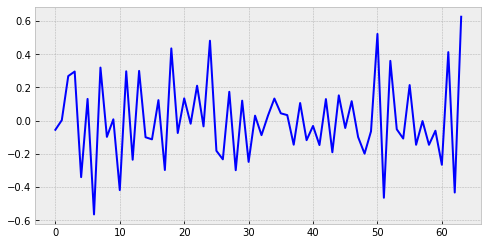

In [10]:
s1_2 = s1_1[12:] - s1_1[:-12]
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(s1_2, color='blue')

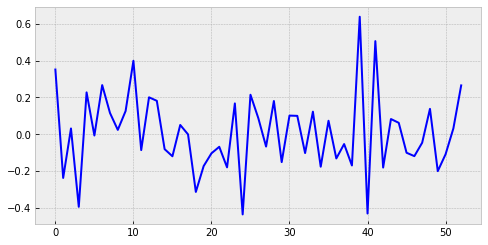

In [11]:
s1_3 = s1_2[11:] - s1_2[:-11]
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(s1_3, color='blue')

In [12]:
test_stationarity(s1_3)

Results of Dickey-Fuller Test:
Test Statistic                -1.134684e+01
p-value                        1.022135e-20
#Lags Used                     0.000000e+00
Number of Observations Used    5.200000e+01
Critical Value (1%)           -3.562879e+00
Critical Value (5%)           -2.918973e+00
Critical Value (10%)          -2.597393e+00
dtype: float64


## Monthly Boston armed robberies

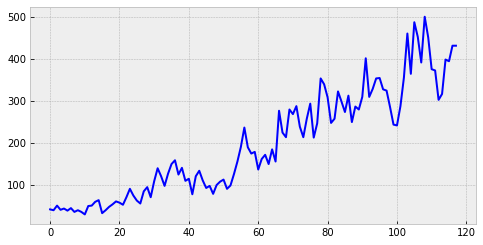

In [13]:
s2 = np.array(robberies_in_boston['Count'])
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(s2, color='blue')

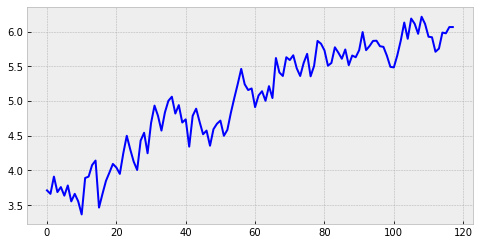

In [14]:
s2_0 = boxcox(s2,0)
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(s2_0, color='blue')

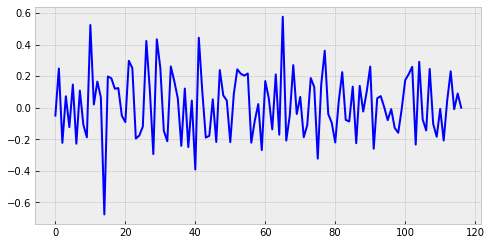

In [15]:
s2_1 = s2_0[1:] - s2_0[:-1]
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(s2_1, color='blue')

In [16]:
test_stationarity(s2_1)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


## International airline passengers: monthly totals in thousands

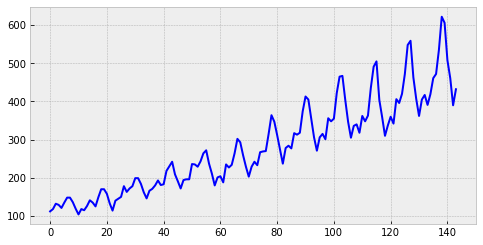

In [17]:
s3 = np.array(airlines_passengers['Count'])
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(s3, color='blue')

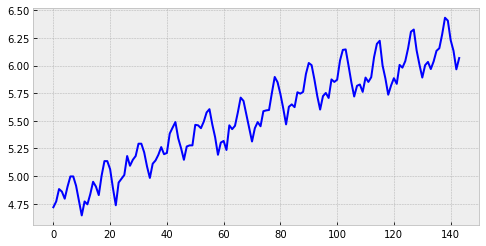

In [18]:
s3_0 = boxcox(s3,0)
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(s3_0, color='blue')

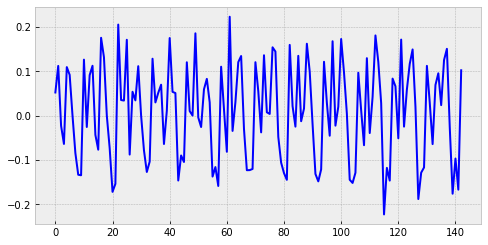

In [19]:
s3_1 = s3_0[1:] - s3_0[:-1]
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(s3_1, color='blue')

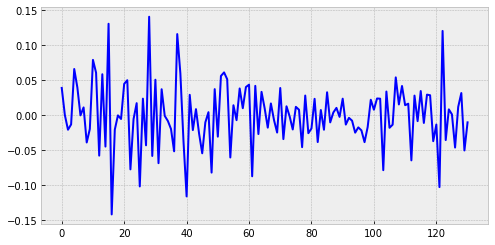

In [20]:
s3_2 = s3_1[12:] - s3_1[:-12]
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(s3_2, color='blue')

In [21]:
test_stationarity(s3_2)

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


## Mean monthly air temperature (Deg. F) Nottingham Castle

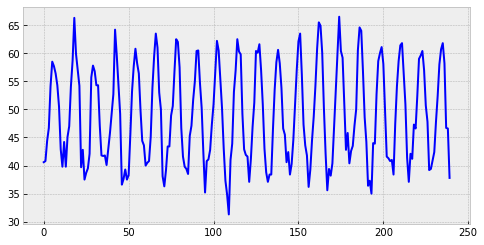

In [22]:
s4 = np.array(mean_monthly_temp['Deg'])
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(s4, color='blue')

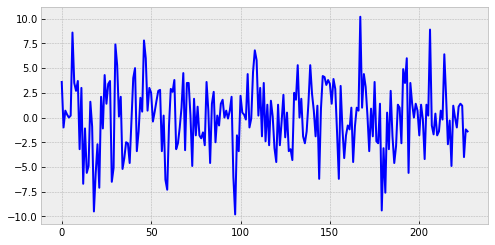

In [23]:
s4_1 = s4[12:] - s4[:-12]
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(s4_1, color='blue')

In [24]:
test_stationarity(s4_1)

Results of Dickey-Fuller Test:
Test Statistic                -6.072501e+00
p-value                        1.141945e-07
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


## Weekly closings of the Dow-Jones industrial average

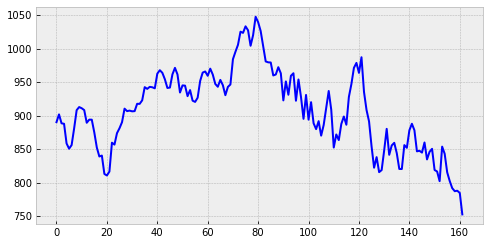

In [25]:
s5 = np.array(dowjones_closing['Close'])
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(s5, color='blue')

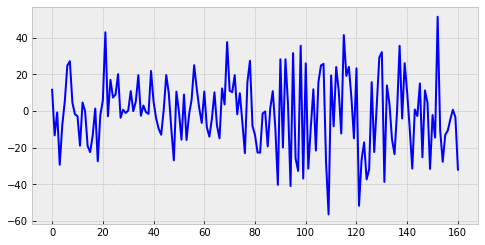

In [26]:
s5_1 = s5[1:] - s5[:-1]
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(s5_1, color='blue')

In [27]:
test_stationarity(s5_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


## Daily total female births in California

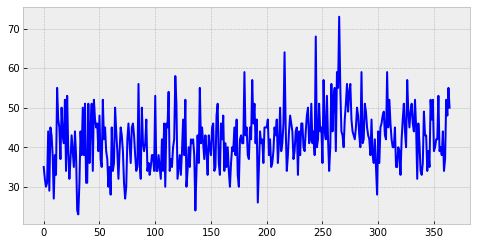

In [28]:
s6 = np.array(female_births['Count'])
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(s6, color='blue')

In [29]:
test_stationarity(s6)

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64
